In [1]:
#Svi importovi
import nltk
import subprocess
import nltk.corpus  
from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords, brown
from collections import Counter
from nltk.text import Text 
import os
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('brown')
nltk.download('averaged_perceptron_tagger')
path_to_gs = "C:\Program Files\gs\gs9.56.1"
os.environ['PATH']+=os.pathsep + path_to_gs

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\istankovic\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\istankovic\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\istankovic\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\istankovic\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\istankovic\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
# Učitavanje teksutalnog dokumenta za obradu i preborajvanje elementa
book = open("C:\\Users\\istankovic\\Desktop\\spremink\\projekt\\Analiza teksta 2\\harry_potter_1.txt", "r", encoding = "UTF-8")
book_raw = book.read()
print('Broj znakova: ',len(book_raw))

Broj znakova:  437017


In [3]:
# 1. Normalizacija teksta
#Prebaciti sve u mala slova
book_lowercase = book_raw.lower()
print('Nakon normalizacije: \n', book_lowercase[100:200])

Nakon normalizacije: 
 otter &
the sorcerer’s stone


by j.k. rowling
 

hp 1 - harry potter and the sorcerer's stone
 

ch


In [4]:
# 2. tokenizacija teksta
#Podjela na rečenice
book_tokenized = sent_tokenize(book_lowercase)
print('Broj rečenica: ',len(book_tokenized))

#Podjela na riječi(tokene)
book_tokens = word_tokenize(book_lowercase)
print('Tokena nakon tokeniziranje ima: ', len(book_tokens))

Broj rečenica:  4866
Tokena nakon tokeniziranje ima:  100932


In [5]:
# 3. Pročistiti tekst od suvišnih elemenata
# Uklanjaju se ne-alfanumerički znakovi, ali brojevi ostaju
book_tokens_clean = [word for word in book_tokens if word.isalpha()]
print('Ukupan broj tokena bez ne-alfanumeričkih znakova: ', len(book_tokens_clean))

Ukupan broj tokena bez ne-alfanumeričkih znakova:  79015


In [6]:
# 4. Stemming teksta
# Stemtatizacija
porter = nltk.PorterStemmer()
stemedList = []
for word in book_tokens_clean:
    stemedList.append(porter.stem(word))
    
print(stemedList[0:50])

['hp', 'harri', 'potter', 'and', 'the', 'sorcer', 'stone', 'harri', 'potter', 'and', 'the', 'sorcer', 'stone', 'harri', 'potter', 'the', 'sorcer', 's', 'stone', 'by', 'rowl', 'hp', 'harri', 'potter', 'and', 'the', 'sorcer', 'stone', 'chapter', 'one', 'the', 'boy', 'who', 'live', 'm', 'and', 'dursley', 'of', 'number', 'four', 'privet', 'drive', 'were', 'proud', 'to', 'say', 'that', 'they', 'were', 'perfectli']


In [7]:
# 5. Lematizacija
wnl = nltk.WordNetLemmatizer()
book_lemma_list = []
for word in book_tokens_clean:
    book_lemma_list.append(wnl.lemmatize(word))

print(book_lemma_list[0:50])

['hp', 'harry', 'potter', 'and', 'the', 'sorcerer', 'stone', 'harry', 'potter', 'and', 'the', 'sorcerer', 'stone', 'harry', 'potter', 'the', 'sorcerer', 's', 'stone', 'by', 'rowling', 'hp', 'harry', 'potter', 'and', 'the', 'sorcerer', 'stone', 'chapter', 'one', 'the', 'boy', 'who', 'lived', 'm', 'and', 'dursley', 'of', 'number', 'four', 'privet', 'drive', 'were', 'proud', 'to', 'say', 'that', 'they', 'were', 'perfectly']


In [8]:
# 6. Maknuti stop words
print('Broj tokena prije uklanjanja stop words: ', len(book_lemma_list))
no_stop_words = [word for word in book_lemma_list if not word in stopwords.words("english")]
print('Ukupan broj tokena nakon obrade: ', len(no_stop_words))

Broj tokena prije uklanjanja stop words:  79015
Ukupan broj tokena nakon obrade:  40766


In [9]:
# 7. Izračunati frekvencije riječi u listi i sa prikazom u grafičkom obliku
word_count = Counter(no_stop_words)
print('Pojavnost 20 najčešćih riječi nakon lematizacije i stematizacije:\n\n', word_count.most_common(20))

Pojavnost 20 najčešćih riječi nakon lematizacije i stematizacije:

 [('harry', 1336), ('wa', 1186), ('said', 794), ('ron', 425), ('hagrid', 370), ('hermione', 268), ('one', 262), ('back', 257), ('got', 206), ('get', 202), ('could', 197), ('know', 197), ('like', 194), ('professor', 177), ('see', 174), ('looked', 169), ('snape', 167), ('dumbledore', 157), ('around', 141), ('dudley', 137)]


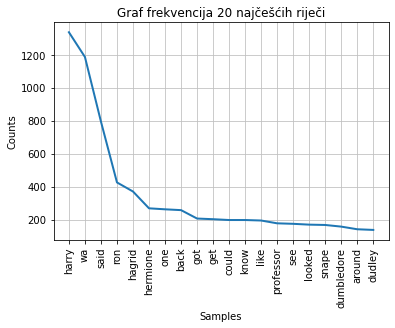

<AxesSubplot:title={'center':'Graf frekvencija 20 najčešćih riječi'}, xlabel='Samples', ylabel='Counts'>

In [15]:
fd = nltk.FreqDist(no_stop_words)
pojavnost = fd.most_common(20)
fd.plot(20,title='Graf frekvencija 20 najčešćih riječi')

In [10]:
# 8. Prikazati concordance za najfrekventnije riječi
pojavnost2 = []

# pojavnost ima key i value vrijednosti (rijeci i frekvencije)
# ovime se izdvajaju samo najcesce koristenih "n" rijeci iz prethodnog bloka

for rijec in pojavnost:
    pojavnost2.append(rijec[0])
    
tokens1 = nltk.word_tokenize(book_raw)
text1 = nltk.Text(no_stop_words)

for p in pojavnost2:
    text1.concordance(p)
    print("\n")

NameError: name 'pojavnost' is not defined

In [17]:
# 9. Prikazati kolokacije
text1 = nltk.Text(tokens1)
text1.collocation_list()

[('Uncle', 'Vernon'),
 ('Professor', 'McGonagall'),
 ('Aunt', 'Petunia'),
 ('said', 'Ron'),
 ('said', 'Harry'),
 ('said', 'Hagrid'),
 ('Mr.', 'Dursley'),
 ('Privet', 'Drive'),
 ('common', 'room'),
 ('Nimbus', 'Two'),
 ('Great', 'Hall'),
 ('Stone', 'CHAPTER'),
 ('Mrs.', 'Dursley'),
 ('Harry', 'Potter'),
 ('Two', 'Thousand'),
 ('invisibility', 'cloak'),
 ('Madam', 'Pomfrey'),
 ('Mr.', 'Ollivander'),
 ('Leaky', 'Cauldron'),
 ('Madam', 'Hooch')]

In [ ]:
text1.dispersion_plot(pojavnost2)

In [11]:
# 10. Izračunati leksički diverzificitet 
def lexical_diversity(text):
    return len(set(text)) / len(text)
def percentage(count, total):
    return 100 * count / total

print('Lexical diversity = ', lexical_diversity(no_stop_words), '\n')
print('Percentage of word "' + pojavnost2[0] + '" = ', percentage(no_stop_words.count(pojavnost2[0]), len(no_stop_words)))
print('Percentage of word "' + pojavnost2[1] + '" = ', percentage(no_stop_words.count(pojavnost2[1]), len(no_stop_words)))
print('Percentage of word "' + pojavnost2[2] + '" = ', percentage(no_stop_words.count(pojavnost2[2]), len(no_stop_words)))

Lexical diversity =  0.12186626109993622 



IndexError: list index out of range

In [20]:
# 11. Prikazati primjer primjene korpusa teksta npr Brown.
print('Dostupne Brown kategorije:\n', brown.categories())
genres = brown.categories()

# Snaga zaključivanja nije velika jer su najfrekventnije riječi imena proizvoda
words = pojavnost2[:5]
for i in range(0,len(genres)):
    genre = genres[i]
    print()
    print("Provjera pojavnosti u kategoriji '"+ genre + "' za riječi:")
    genre_text = brown.words(categories = genre)
    fdist = nltk.FreqDist(genre_text)
    for w in words:
        print(w + ':', fdist[w], end=' ')
    print('\n')
    
print("="*50)


# Više ima smisla ispustiti imena
words = pojavnost2[1],pojavnost2[5],pojavnost2[6],pojavnost2[14],pojavnost2[17]

for i in range(0,len(genres)):
    genre = genres[i]
    print()
    print("Provjera pojavnosti u kategoriji '"+ genre + "' za riječi:")
    genre_text = brown.words(categories = genre)
    fdist = nltk.FreqDist(genre_text)
    for w in words:
        print(w + ':', fdist[w], end=' ')
    print('\n')

Dostupne Brown kategorije:
 ['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction']

Provjera pojavnosti u kategoriji 'adventure' za riječi:
dudley: 0 around: 71 dumbledore: 0 snape: 0 looked: 62 


Provjera pojavnosti u kategoriji 'belles_lettres' za riječi:
dudley: 0 around: 57 dumbledore: 0 snape: 0 looked: 39 


Provjera pojavnosti u kategoriji 'editorial' za riječi:
dudley: 0 around: 20 dumbledore: 0 snape: 0 looked: 3 


Provjera pojavnosti u kategoriji 'fiction' za riječi:
dudley: 0 around: 71 dumbledore: 0 snape: 0 looked: 72 


Provjera pojavnosti u kategoriji 'government' za riječi:
dudley: 0 around: 6 dumbledore: 0 snape: 0 looked: 2 


Provjera pojavnosti u kategoriji 'hobbies' za riječi:
dudley: 0 around: 41 dumbledore: 0 snape: 0 looked: 6 


Provjera pojavnosti u kategoriji 'humor' za riječi:
dudley: 0 around: 15 dumbledore: 0 snape: 0 looked: 13 


In [12]:
# 12. Tagirati riječi i prikazati lingvističko stablo na temelju vlastitog uzorka teksta
sent1 = book_tokenized[9]
print(sent1)
tokens1 = word_tokenize(sent1)
print(tokens1)
sent_tokens1 = nltk.pos_tag(word_tokenize(sent1))
sent_tokens1

the dursleys shuddered to think what the neighbors would say if the potters arrived in the street.
['the', 'dursleys', 'shuddered', 'to', 'think', 'what', 'the', 'neighbors', 'would', 'say', 'if', 'the', 'potters', 'arrived', 'in', 'the', 'street', '.']


[('the', 'DT'),
 ('dursleys', 'NNS'),
 ('shuddered', 'VBD'),
 ('to', 'TO'),
 ('think', 'VB'),
 ('what', 'WP'),
 ('the', 'DT'),
 ('neighbors', 'NNS'),
 ('would', 'MD'),
 ('say', 'VB'),
 ('if', 'IN'),
 ('the', 'DT'),
 ('potters', 'NNS'),
 ('arrived', 'VBD'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('street', 'NN'),
 ('.', '.')]

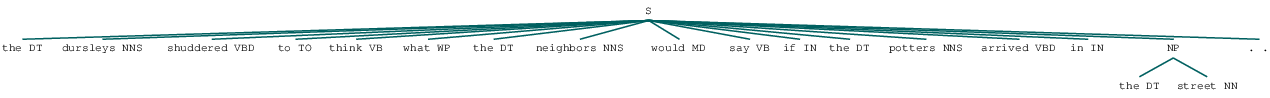

In [13]:
grammar_np = r"NP: {<DT>?<JJ>*<NN>}" 
chunk_parser1 = nltk.RegexpParser(grammar_np)
chunk_result1 = chunk_parser1.parse(sent_tokens1)
chunk_result1

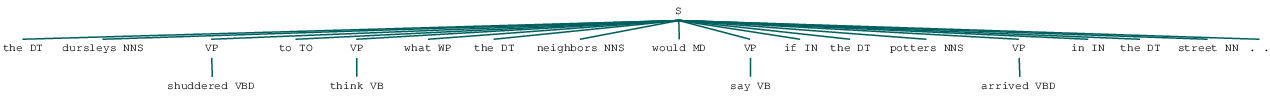

In [23]:
grammar_vp = r"VP: {<PRP>?<VB|VBD|VBZ|VBG>*<RB|RBR>?}"
chunk_parser2 = nltk.RegexpParser(grammar_vp)
sent2 = sent1
sent_tokens2 = nltk.pos_tag(word_tokenize(sent2))
sent_tokens2
chunk_result2 = chunk_parser2.parse(sent_tokens2)
chunk_result2